Reading data	0.85 s
Preparing input	5.47 s


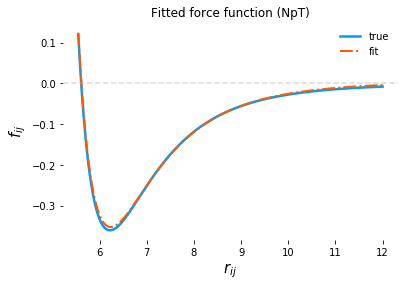

In [19]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * 5 ** 12 * x ** (-12) - 5 ** 6 * x ** (-6))

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 5/100}
steps = 3
timesteps_in_fit = 110

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')


x = np.linspace(5.55, 12, 1000)
proc.prepare_training_data()
proc.fit()

y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)

#### Reduce parameter set

powers: (-7, -13)
weights: [-2.78929106e+05  8.77520006e+09]


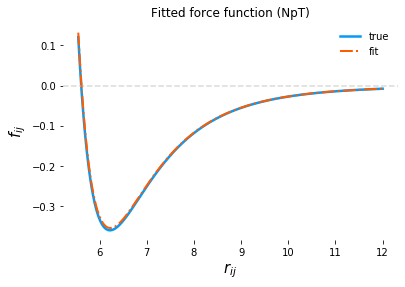

In [20]:
x = np.linspace(5.55, 12., 10000)
weights, RSS = proc.best_subset([2], x)
RSS = dict(sorted(RSS.items(), key=lambda item: item[1]))
key = (-7, -13)
print(f"powers: {key}")
print(f"weights: {weights[key]}")

original_weights = proc.weights.copy()
original_params = proc.basis_params.copy()
proc.weights = weights[key]
proc.basis_params = list(key)
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.weights = original_weights
proc.basis_params = original_params

## Heavy

Reading data	1.68 s
Preparing input	6.09 s


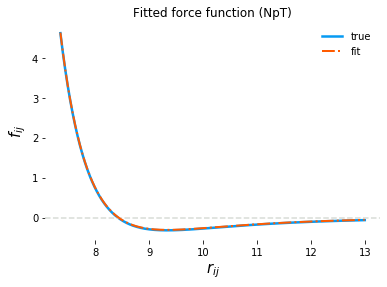

In [14]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_heavy_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 6/200}
steps = 6
timesteps_in_fit = 200

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')

x = np.linspace(7.35, 13, 1000)
proc.prepare_training_data()
proc.fit()

y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)

#### Reduce parameter set

powers: (-7, -13)
weights: [-4.19372966e+06  1.50838956e+12]


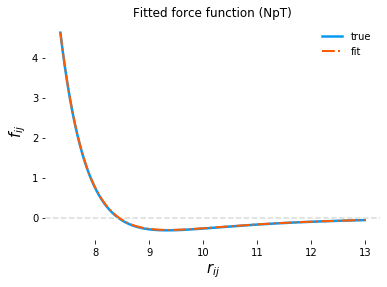

In [17]:
x = np.linspace(7.35, 13, 10000)
weights, RSS = proc.best_subset([2], x)
RSS = dict(sorted(RSS.items(), key=lambda item: item[1]))
key = (-7, -13)
print(f"powers: {key}")
print(f"weights: {weights[key]}")

original_weights = proc.weights.copy()
original_params = proc.basis_params.copy()
proc.weights = weights[key]
proc.basis_params = list(key)
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.weights = original_weights
proc.basis_params = original_params

# Molecule

In [2]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5


for steps in []:
    for timesteps_in_fit in range(100, 310, 10):
        for cutoff in [26, 27, 28, 29, 30]:
            proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                                  basis=basis_function, basis_parameters=params,
                                  every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                                  system_style='molecular', op_sys="W")

            proc.prepare_training_data()
            proc.fit()

            x = np.linspace(5.25, 50, 1000)
            y_fit = proc.predict(x)
            plot_1component(x, y_fit, thermostat='NpT', output_path=f"D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}_{cutoff}.png")

Reading data	35.68 s
Preparing input	9.3 s

Non-zero weight powers: [ 0 -2 -4 -8]
pair_coeff	1 1 0.003904582871198603  0   -10.070149792132966  0   584.0750251095951  0   0   0   -166956.66388500296  0   0   0   0   0   0   


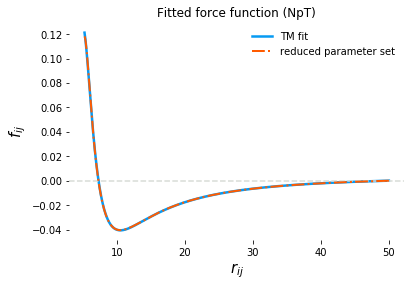

In [1]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 3
timesteps_in_fit = 190
cutoff = 26

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular', op_sys='W')

proc.prepare_training_data()
proc.fit()

reduce_parameters = True
x = np.linspace(5.25, 50, 1000)
if reduce_parameters:
    proc.best_subset([3,4], x, center_y=True)
else:
    y_fit = proc.predict(x)
    plot_1component(x, y_fit, thermostat='NpT', output_path=f"D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}_{cutoff}.png")



[3, 190, 26]
pair_coeff	1 1 0.0038814542788404155  0   -10.049691508029902  0   582.2152666329853  0   0   0   -165426.6506515867  0   0   0   0   0   0   

[3, 230, 27]
pair_coeff	1 1 0.0022222525899326107  0   -5.234822756660577  0   414.1725587403853  0   -6027.539803477441  0   0   0   0   0   0   0   0   

[3, 240, 29]
pair_coeff	1 1 0.0033321423373175035  0   -8.801710379863021  0   456.83024907467757  0   0   0   -141280.31623404703  0   0   0   0   0   0   

[3, 250, 30]
pair_coeff	1 1 0.0017521379722418712  0   -4.731459346955845  0   351.49890132077235  0   0   0   -115072.340859449  0   0   0   0   0   0   

[3, 260, 28]
pair_coeff	1 1 0.0028658542791124703  0   -7.5109157900702  0   441.9485136557555  0   0   0   -142004.8083953855  0   0   0   0   0   0   

[3, 270, 30]
pair_coeff	1 1 0.003969918347902557  0   -10.444494914251585  0   518.669598542049  0   0   0   -156525.49102713645  0   0   0   0   0   0   

[3, 280, 30]
pair_coeff	1 1 0.005007772737485788  0   -13.13444

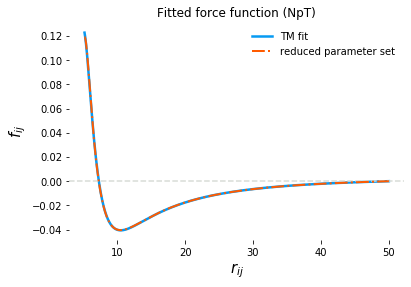

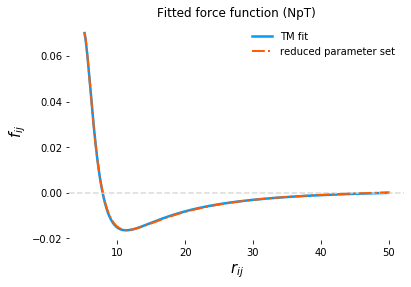

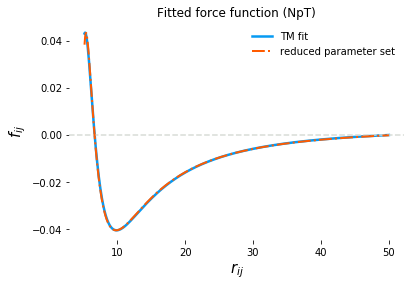

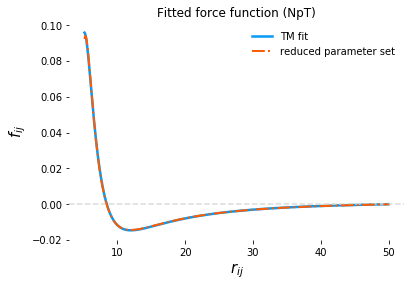

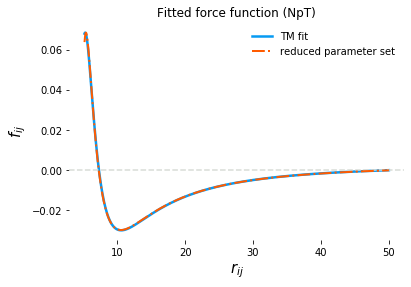

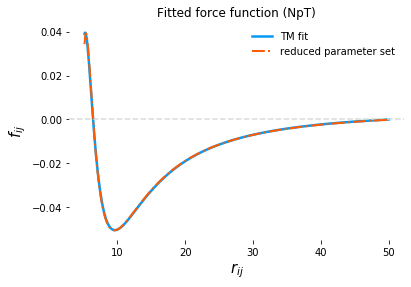

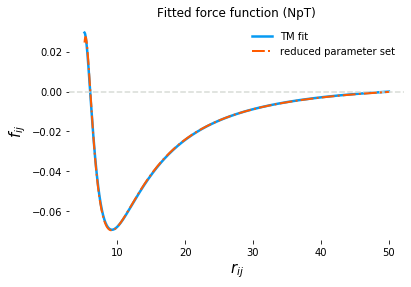

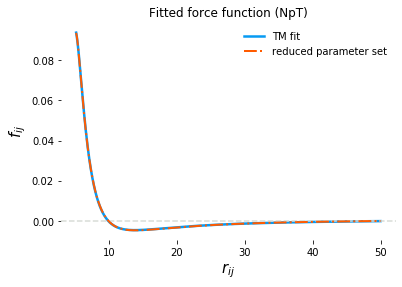

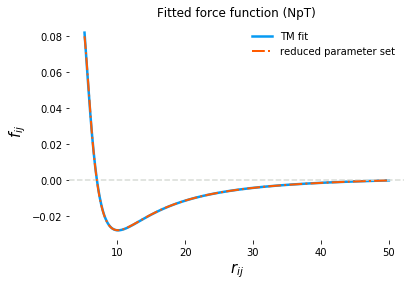

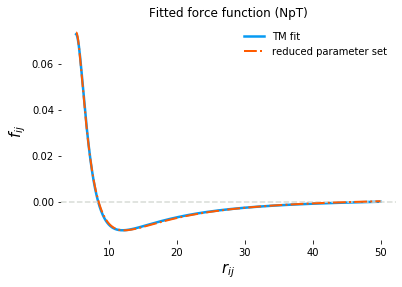

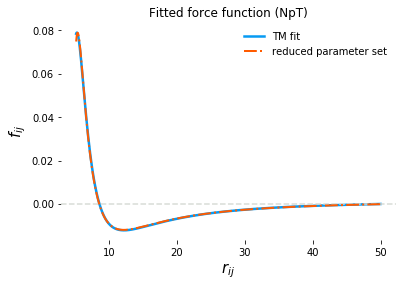

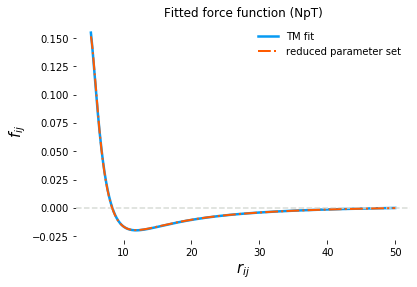

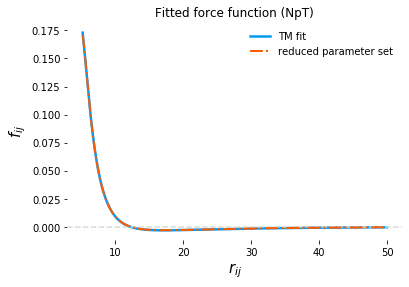

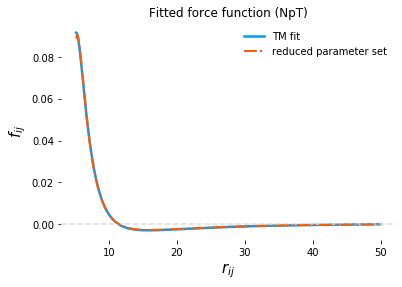

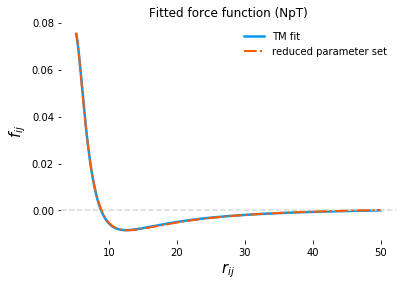

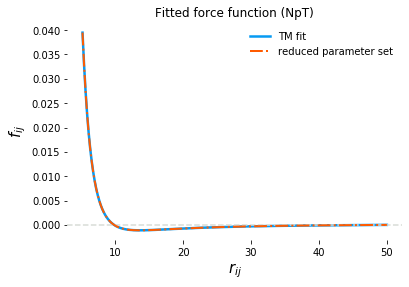

In [1]:
import numpy as np
from tm_develop import TrajectoryMatching

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5

inputs = [[3, 190, 26], [3, 230, 27], [3, 240, 29], [3, 250, 30],
          [3, 260, 28], [3, 270, 30], [3, 280, 30], [3, 290, 30],
          [4, 160, 26], [4, 180, 27], [4, 200, 30], [5, 110, 27],
          [5, 120, 30], [5, 160, 30], [6, 120, 26], [6, 220, 30]]

for input in inputs:
    print(input)
    steps = input[0]
    timesteps_in_fit = input[1]
    cutoff = input[2]
    proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                          basis=basis_function, basis_parameters=params,
                          every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                          system_style='molecular', op_sys="W")

    proc.prepare_training_data()
    proc.fit()

    x = np.linspace(5.2, 50, 1000)
    proc.best_subset([3,4], x, center_y=True)
